In [2]:
#Import Libraries

%matplotlib inline
from simulation import *
from scipy.special import comb
import matplotlib.pyplot as plt
import numpy as np

Generating mGraph
----- DONE
Getting layout


----- DONE
Setting default attributes


----- DONE
Choosing the source
----- DONE
Choosing the monitoring nodes
----- DONE
Mlist :  [324, 166, 422, 373, 182, 291, 294, 459, 273, 285, 394, 49, 431, 218, 459, 484, 322, 7, 465, 323, 186, 228, 259, 220, 397, 70, 92, 404, 136, 117, 315, 63, 31, 263, 320, 165, 8, 143, 317, 174, 462, 330, 115, 436, 386, 140, 37, 63, 42, 91] 
Slist :  [126]


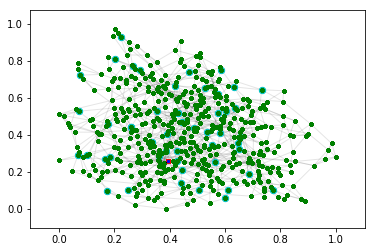

Starting infection


In [70]:
#Run the simulation

figureList = list()
# Parameters definition
numRumors = 1000
maxThreshold = 1
numMonitors = 50
propagProba = 0.2
numNodes = 500
linkProba = 0.2
monitorTrigger = list()
numStep = 100

j=0

Graph, Pos, rumorSources, monitorsList = generateGraphReady(numNodes,linkProba,maxThreshold,numRumors,numMonitors)
fig1 =  drawColoredGraph(Graph, Pos, numRumors, rumorSources, monitorsList)
#fig1.savefig('./TestFigs/figT'+str(j)+'.png')
print("Starting infection")
infections = [[] for n in range(numRumors)]
infected = getInfectedList(Graph,numRumors)

while(not isAllInfected(Graph,numRumors)):

    Graph = infectionForward(Graph, propagProba, numRumors)
    infected = getInfectedList(Graph,numRumors)
    # j+1 because j=0 is step 1
    monitorTrigger = updateMonitorTrig(j+1,monitorTrigger,monitorsList,Graph,numRumors)
    j += 1
    #fig2 = drawColoredGraph(Graph, Pos, numRumors, rumorSources, myMonitors=monitorsList,myIndex=j)
    
print("----DONE")
monitorTrigger2 = sorted(monitorTrigger, key=lambda x : (x[0], x[2]))

In [ ]:
# Find the maximum number of steps :
maxStep = -1
for step in monitorTrigger2:
    if step[2] > maxStep :
        maxStep = step[2]
        
        
# create array for each monitoring node
HistoDict = dict()

#Fill in the array
for monitor in monitorsList :
    HistoDict[monitor] = np.zeros((maxStep+1,1))
    for elem in monitorTrigger2 :
        if monitor == elem[0] :
            HistoDict[monitor][elem[2]] += 1
    HistoDict[monitor] = np.cumsum(HistoDict[monitor])/numRumors

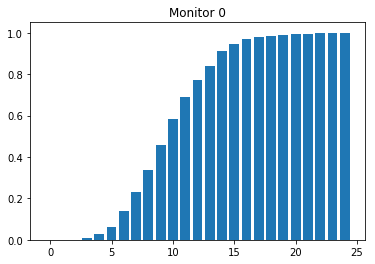

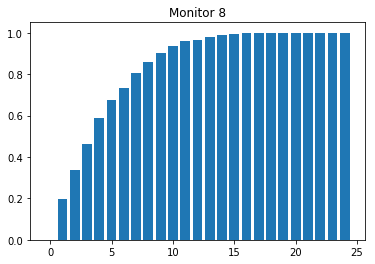

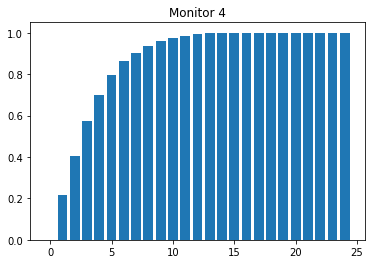

In [52]:
for m in monitorsList :
    plt.bar(range(0,maxStep+1),HistoDict[m])
    plt.title("Monitor "+str(m))
    plt.show()

In [61]:
sourceHisto = {}
monitorToTest = 0

for source in Graph.nodes():
    if source not in monitorsList :
        sourceHisto[source]=np.zeros((maxStep+1,1))
        for i in range(0,maxStep+1):
            sourceHisto[source][i] = calculProba(propagProba,len(nx.shortest_path(Graph,source,monitorToTest))-1,i)

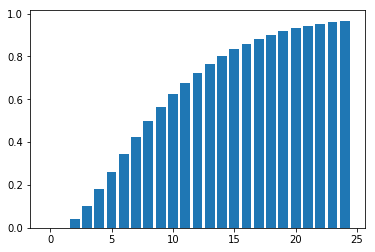

Dist = 13.1696251977


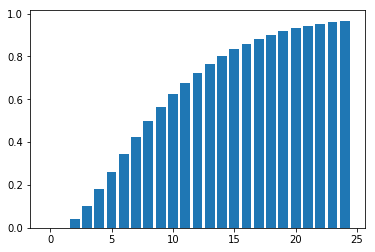

Dist = 13.1696251977


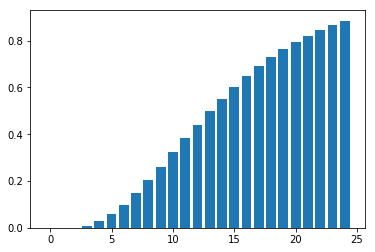

Dist = 13.622358119


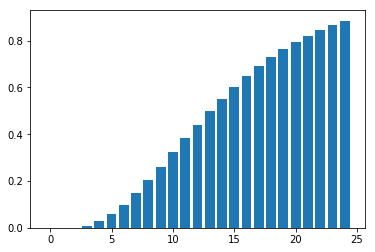

Dist = 13.622358119


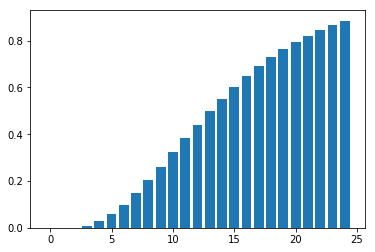

Dist = 13.622358119


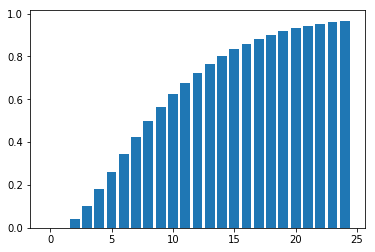

Dist = 13.1696251977


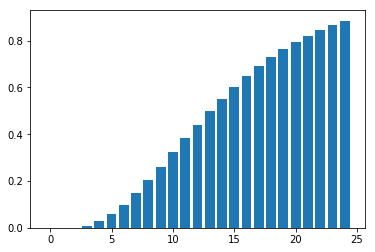

Dist =

 13.622358119


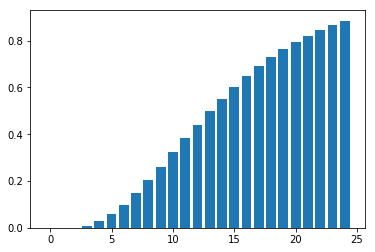

Dist = 13.622358119

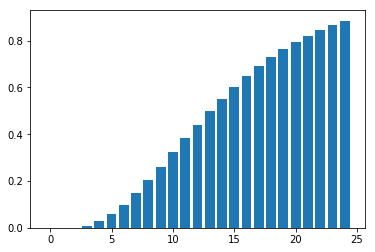

Dist = 13.622358119


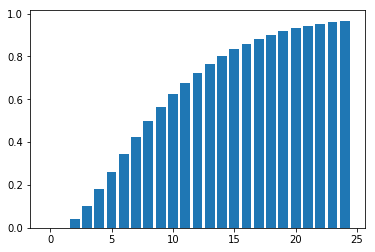

Dist = 13.1696251977

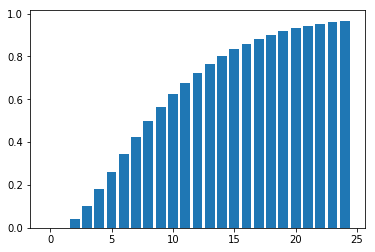

Dist = 13.1696251977


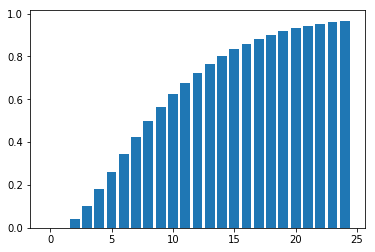

Dist = 13.1696251977


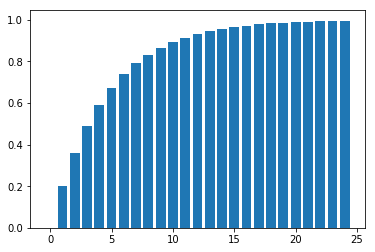

Dist =

 13.2216666648


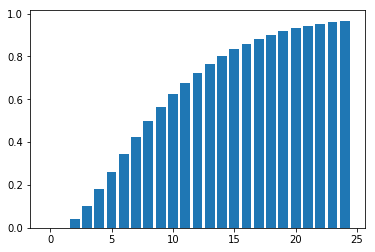

Dist = 13.1696251977


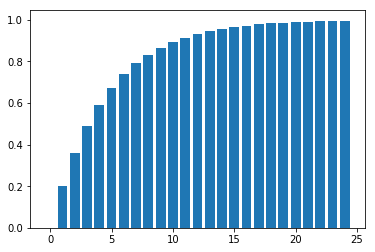

Dist = 13.2216666648


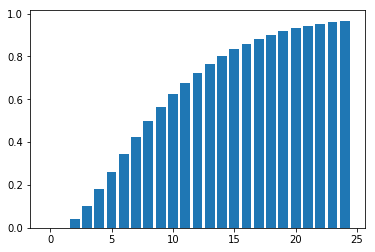

Dist = 13.1696251977


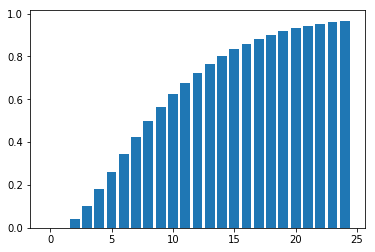

Dist = 13.1696251977


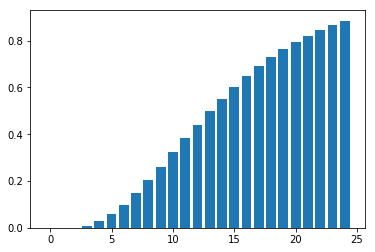

Dist = 13.622358119


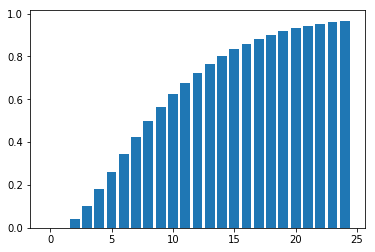

Dist = 13.1696251977


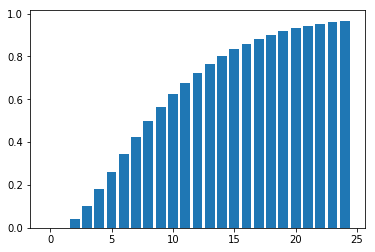

Dist = 13.1696251977


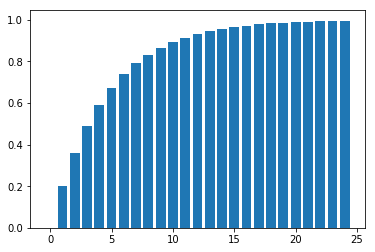

Dist =

 13.2216666648


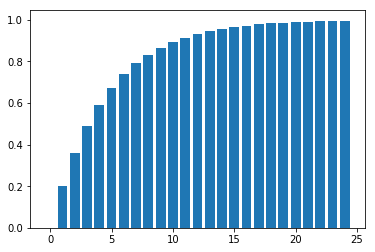

Dist = 13.2216666648
[(1, 13.169625197719482), (2, 13.169625197719482), (7, 13.169625197719482), (12, 13.169625197719482), (13, 13.169625197719482), (14, 13.169625197719482), (16, 13.169625197719482), (18, 13.169625197719482), (19, 13.169625197719482), (21, 13.169625197719482), (22, 13.169625197719482), (15, 13.221666664846074), (17, 13.221666664846074), (23, 13.221666664846074), (24, 13.221666664846074), (3, 13.62235811895993), (5, 13.62235811895993), (6, 13.62235811895993), (9, 13.62235811895993), (10, 13.62235811895993), (11, 13.62235811895993), (20, 13.62235811895993)]


In [69]:
dList = []

for i in Graph.nodes():
    if i not in monitorsList:
        plt.bar(range(0,maxStep+1),sourceHisto[i])
        plt.show()
        d = np.linalg.norm(sourceHisto[i]-HistoDict[0])
        dList.append((i,d))
        print("Dist =",d)
        
print(sorted(dList,key=lambda x : x[1]))

{0: array([[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.008     ],
        [ 0.0272    ],
        [ 0.05792   ],
        [ 0.09888   ],
        [ 0.148032  ],
        [ 0.20308224],
        [ 0.2618025 ],
        [ 0.32220047],
        [ 0.38259845],
        [ 0.44165425],
        [ 0.49834782],
        [ 0.55194901],
        [ 0.60197679],
        [ 0.64815628],
        [ 0.69037753],
        [ 0.72865812],
        [ 0.76311066],
        [ 0.79391528],
        [ 0.82129717],
        [ 0.84550852],
        [ 0.86681451]]), 2: array([[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.008     ],
        [ 0.0272    ],
        [ 0.05792   ],
        [ 0.09888   ],
        [ 0.148032  ],
        [ 0.20308224],
        [ 0.2618025 ],
        [ 0.32220047],
        [ 0.38259845],
        [ 0.44165425],
        [ 0.49834782],
        [ 0.55194901],
        [ 0.60197679],
        [ 0.64815628],
        [ 0.69037753],
        [ 0.72865812],
    